In [4]:
from google.colab import files
uploaded = files.upload()



Saving kaggle.json to kaggle.json


In [7]:
import os

# Create .kaggle folder
os.makedirs("/root/.kaggle", exist_ok=True)

# Move the uploaded file to that folder
!cp kaggle.json /root/.kaggle/

# Set permissions
!chmod 600 /root/.kaggle/kaggle.json



cp: cannot stat 'kaggle.json': No such file or directory


In [8]:
from google.colab import files
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [9]:
print(uploaded)


{'kaggle.json': b'{"username":"cyberpulsex","key":"1c72d9993826330a678cedb5b62fd8b1"}'}


In [11]:
import os

# Create the .kaggle directory
os.makedirs("/root/.kaggle", exist_ok=True)

# Move kaggle.json to the directory
!cp kaggle.json /root/.kaggle/

# Set file permissions
!chmod 600 /root/.kaggle/kaggle.json


In [13]:
!kaggle datasets list -s "devanagari-character-dataset"



ref                                                        title                                                size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ---------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
ashokpant/devanagari-character-dataset                     Devanagari Character Dataset                      8644341  2018-05-07 06:57:49.150000           3966        110  0.7647059        
ashokpant/devanagari-character-dataset-large               Devanagari Character Dataset Large              135043043  2017-06-23 03:57:21.497000            874         31  0.7647059        
rishianand/devanagari-character-set                        Devanagari Character Set                        124230156  2017-11-21 10:15:09.430000           5139         97  0.7647059        
medahmedkrichen/devanagari-handwritten-character-d

In [14]:
!kaggle datasets download -d ashokpant/devanagari-character-dataset


Dataset URL: https://www.kaggle.com/datasets/ashokpant/devanagari-character-dataset
License(s): DbCL-1.0
  0% 0.00/8.24M [00:00<?, ?B/s]
100% 8.24M/8.24M [00:00<00:00, 941MB/s]


In [15]:
import zipfile

with zipfile.ZipFile("devanagari-character-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("devanagari_dataset")


In [16]:
!ls devanagari_dataset


labels.csv  nhcd


In [17]:
!ls devanagari_dataset/nhcd


nhcd


In [18]:
!ls devanagari_dataset/nhcd


nhcd


In [19]:
!ls devanagari_dataset/nhcd/nhcd


consonants  numerals  vowels


In [20]:
data_dir = "devanagari_dataset/nhcd/nhcd"


In [21]:
import os

for category in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, category)
    num_images = sum([len(files) for r, d, files in os.walk(folder_path)])
    print(f"{category}: {num_images} images")


numerals: 2880 images
vowels: 2652 images
consonants: 7380 images


In [23]:
import matplotlib.pyplot as plt
import cv2
import os

# Folder: choose "consonants", "numerals", or "vowels"
sample_folder = os.path.join(data_dir, "consonants")

# List files safely
image_files = [f for f in os.listdir(sample_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Plot first 5 valid images
plt.figure(figsize=(10, 2))
count = 0
for image_file in image_files:
    if count == 5:
        break
    img_path = os.path.join(sample_folder, image_file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        plt.subplot(1, 5, count + 1)
        plt.imshow(img, cmap='gray')
        plt.title("Consonant")
        plt.axis('off')
        count += 1
plt.suptitle("Sample Images from Consonants")
plt.show()


<Figure size 1000x200 with 0 Axes>

In [24]:
import os

sample_folder = os.path.join(data_dir, "consonants")
print("Files inside 'consonants':")
print(os.listdir(sample_folder)[:10])  # Show first 10 file names


Files inside 'consonants':
['14', '8', '4', '30', '11', '17', '12', '1', '13', '32']


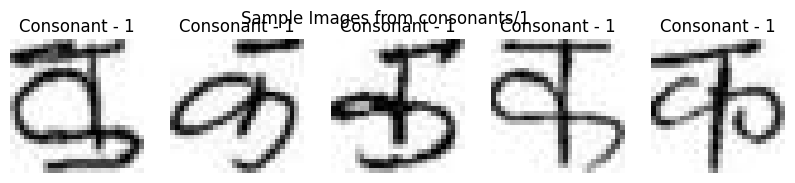

In [25]:
import os
import cv2
import matplotlib.pyplot as plt

# Folder path to a class (e.g., '1')
sample_folder = os.path.join(data_dir, "consonants", "1")

# Get valid image files
image_files = [f for f in os.listdir(sample_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Show first 5 valid images
plt.figure(figsize=(10, 2))
count = 0
for image_file in image_files:
    if count == 5:
        break
    img_path = os.path.join(sample_folder, image_file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        plt.subplot(1, 5, count + 1)
        plt.imshow(img, cmap='gray')
        plt.title("Consonant - 1")
        plt.axis('off')
        count += 1

plt.suptitle("Sample Images from consonants/1")
plt.show()


In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models
import os


In [27]:
data_dir = "devanagari_dataset/nhcd/nhcd"

batch_size = 32
img_height = 64
img_width = 64

# Load training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Load validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Classes:", class_names)


Found 12912 files belonging to 3 classes.
Using 10330 files for training.
Found 12912 files belonging to 3 classes.
Using 2582 files for validation.
Classes: ['consonants', 'numerals', 'vowels']


In [28]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [30]:
model = models.Sequential([
    tf.keras.Input(shape=(img_height, img_width, 3)),  # Define input shape here
    layers.Rescaling(1./255),

    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])


In [31]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 70s 206ms/step - accuracy: 0.6861 - loss: 0.7335 - val_accuracy: 0.9144 - val_loss: 0.2373
Epoch 2/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 79s 201ms/step - accuracy: 0.9234 - loss: 0.1977 - val_accuracy: 0.9388 - val_loss: 0.1597
Epoch 3/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 82s 200ms/step - accuracy: 0.9581 - loss: 0.1183 - val_accuracy: 0.9295 - val_loss: 0.1962
Epoch 4/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 82s 200ms/step - accuracy: 0.9728 - loss: 0.0823 - val_accuracy: 0.9535 - val_loss: 0.1351
Epoch 5/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 82s 199ms/step - accuracy: 0.9855 - loss: 0.0405 - val_accuracy: 0.9497 - val_loss: 0.1891
Epoch 6/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 82s 200ms/step - accuracy: 0.9881 - loss: 0.0344 - val_accuracy: 0.9613 - val_loss: 0.1504
Epoch 7/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 82s 200ms/step - accuracy: 0.9915 - loss: 0.0246 - val_accuracy: 0.9605 - val_loss: 0.1443
Epoch 8/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 65s 202ms/step - accuracy: 0.9952 - loss: 0

In [32]:
# Evaluate the model
loss, acc = model.evaluate(val_ds)
print(f"Validation accuracy: {acc:.2f}")

# Predict on one batch
for images, labels in val_ds.take(1):
    preds = model.predict(images)
    predicted_classes = tf.argmax(preds, axis=1)
    print("Predicted:", predicted_classes.numpy())
    print("Actual:", labels.numpy())


81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.9673 - loss: 0.1477
Validation accuracy: 0.97
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
Predicted: [2 0 1 0 0 0 1 0 2 2 1 2 2 2 2 0 0 0 0 1 0 0 0 0 1 1 2 2 0 1 0 1]
Actual: [2 0 1 0 0 0 1 0 2 2 1 2 2 2 2 0 0 0 2 1 0 0 0 0 1 1 2 2 0 1 0 1]


In [34]:
model.save("hindi_character_cnn.keras")



In [35]:
model = tf.keras.models.load_model("hindi_character_cnn.keras")


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


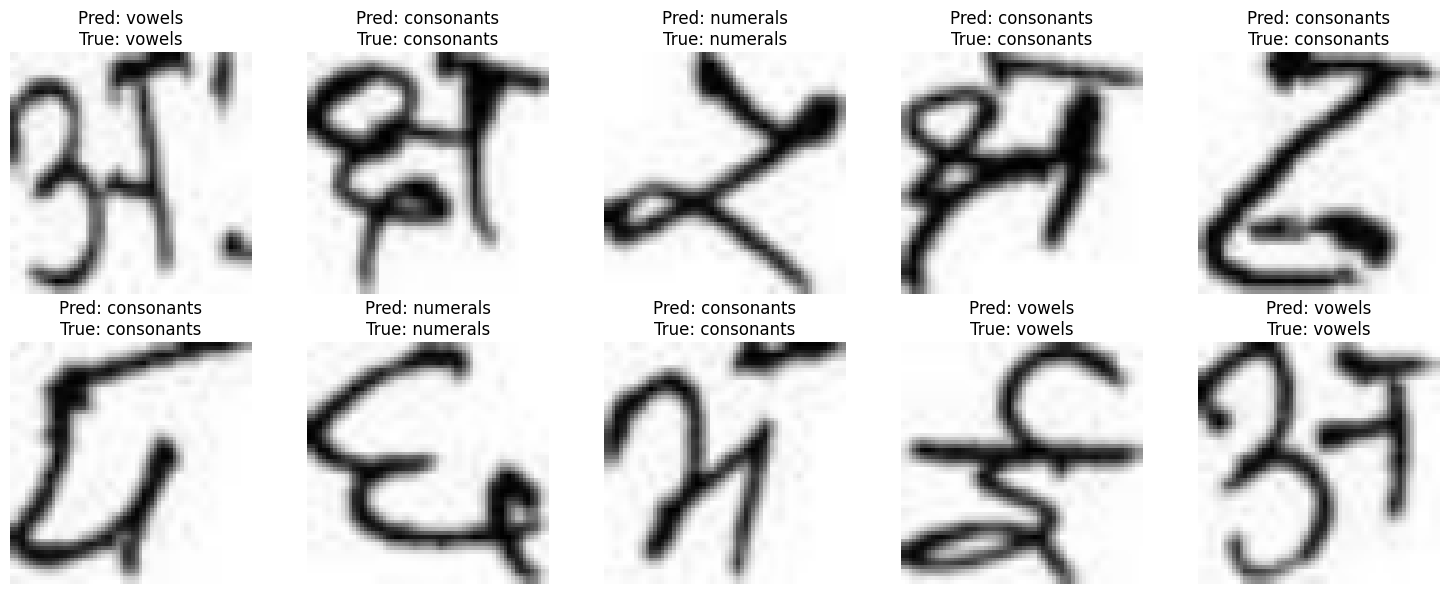

In [36]:
import matplotlib.pyplot as plt

for images, labels in val_ds.take(1):
    preds = model.predict(images)
    predicted_classes = tf.argmax(preds, axis=1)

    plt.figure(figsize=(15, 6))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Pred: {class_names[predicted_classes[i]]}\nTrue: {class_names[labels[i]]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()
